In [24]:
import numpy as np
import matplotlib.pyplot as plt
import os
import pandas as pd
import matplotlib as mpl
mpl.rcParams.update({
    "font.family": "serif",  
    "font.size": 10,  # Adjust font size for better readability
    "axes.labelsize": 14, 
    "axes.titlesize": 16,  
    "xtick.labelsize": 12,  
    "ytick.labelsize": 12,
    "legend.fontsize": 12,
    "lines.linewidth": 1.5,  # Thicker lines for better visibility
    "axes.linewidth": 1.2,  # Thicker axes lines
    "figure.dpi": 300,  # High-resolution figures
    "savefig.dpi": 300,  # High resolution when saving figures
    "savefig.format": "pdf",  # Save in vector format for publications
    "text.usetex": False,  # Use LaTeX for better typography (optional)
    "figure.figsize": (4, 3)
})
from scipy.stats import norm
# import corner
import mesa_web as mw


In [25]:
hist_data = mw.read_history('1M_pre_ms_to_wd/LOGS_to_wd/history.data')
print(type(hist_data))
print(hist_data.keys())
print('#######')
profile5_data = mw.read_profile('1M_pre_ms_to_wd/LOGS_to_wd/profile5.data')
print(type(profile5_data))
print(profile5_data.keys())


<class 'dict'>
dict_keys(['version_number', 'compiler', 'build', 'MESA_SDK_version', 'math_backend', 'date', 'burn_min1', 'burn_min2', 'msun', 'rsun', 'lsun', 'model_number', 'num_zones', 'star_age', 'log_dt', 'star_mass', 'log_xmstar', 'log_abs_mdot', 'mass_conv_core', 'conv_mx1_top', 'conv_mx1_bot', 'conv_mx2_top', 'conv_mx2_bot', 'mx1_top', 'mx1_bot', 'mx2_top', 'mx2_bot', 'log_LH', 'log_LHe', 'log_LZ', 'log_Lnuc', 'pp', 'cno', 'tri_alfa', 'epsnuc_M_1', 'epsnuc_M_2', 'epsnuc_M_3', 'epsnuc_M_4', 'epsnuc_M_5', 'epsnuc_M_6', 'epsnuc_M_7', 'epsnuc_M_8', 'he_core_mass', 'co_core_mass', 'one_core_mass', 'fe_core_mass', 'neutron_rich_core_mass', 'kh_timescale', 'log_Teff', 'log_L', 'log_R', 'log_g', 'v_div_csound_surf', 'surf_avg_j_rot', 'surf_avg_omega', 'surf_avg_omega_crit', 'surf_avg_omega_div_omega_crit', 'surf_avg_v_rot', 'surf_avg_v_crit', 'surf_avg_v_div_v_crit', 'surf_avg_Lrad_div_Ledd', 'log_rotational_mdot_boost', 'log_center_T', 'log_center_Rho', 'log_center_P', 'log_cntr_P', '

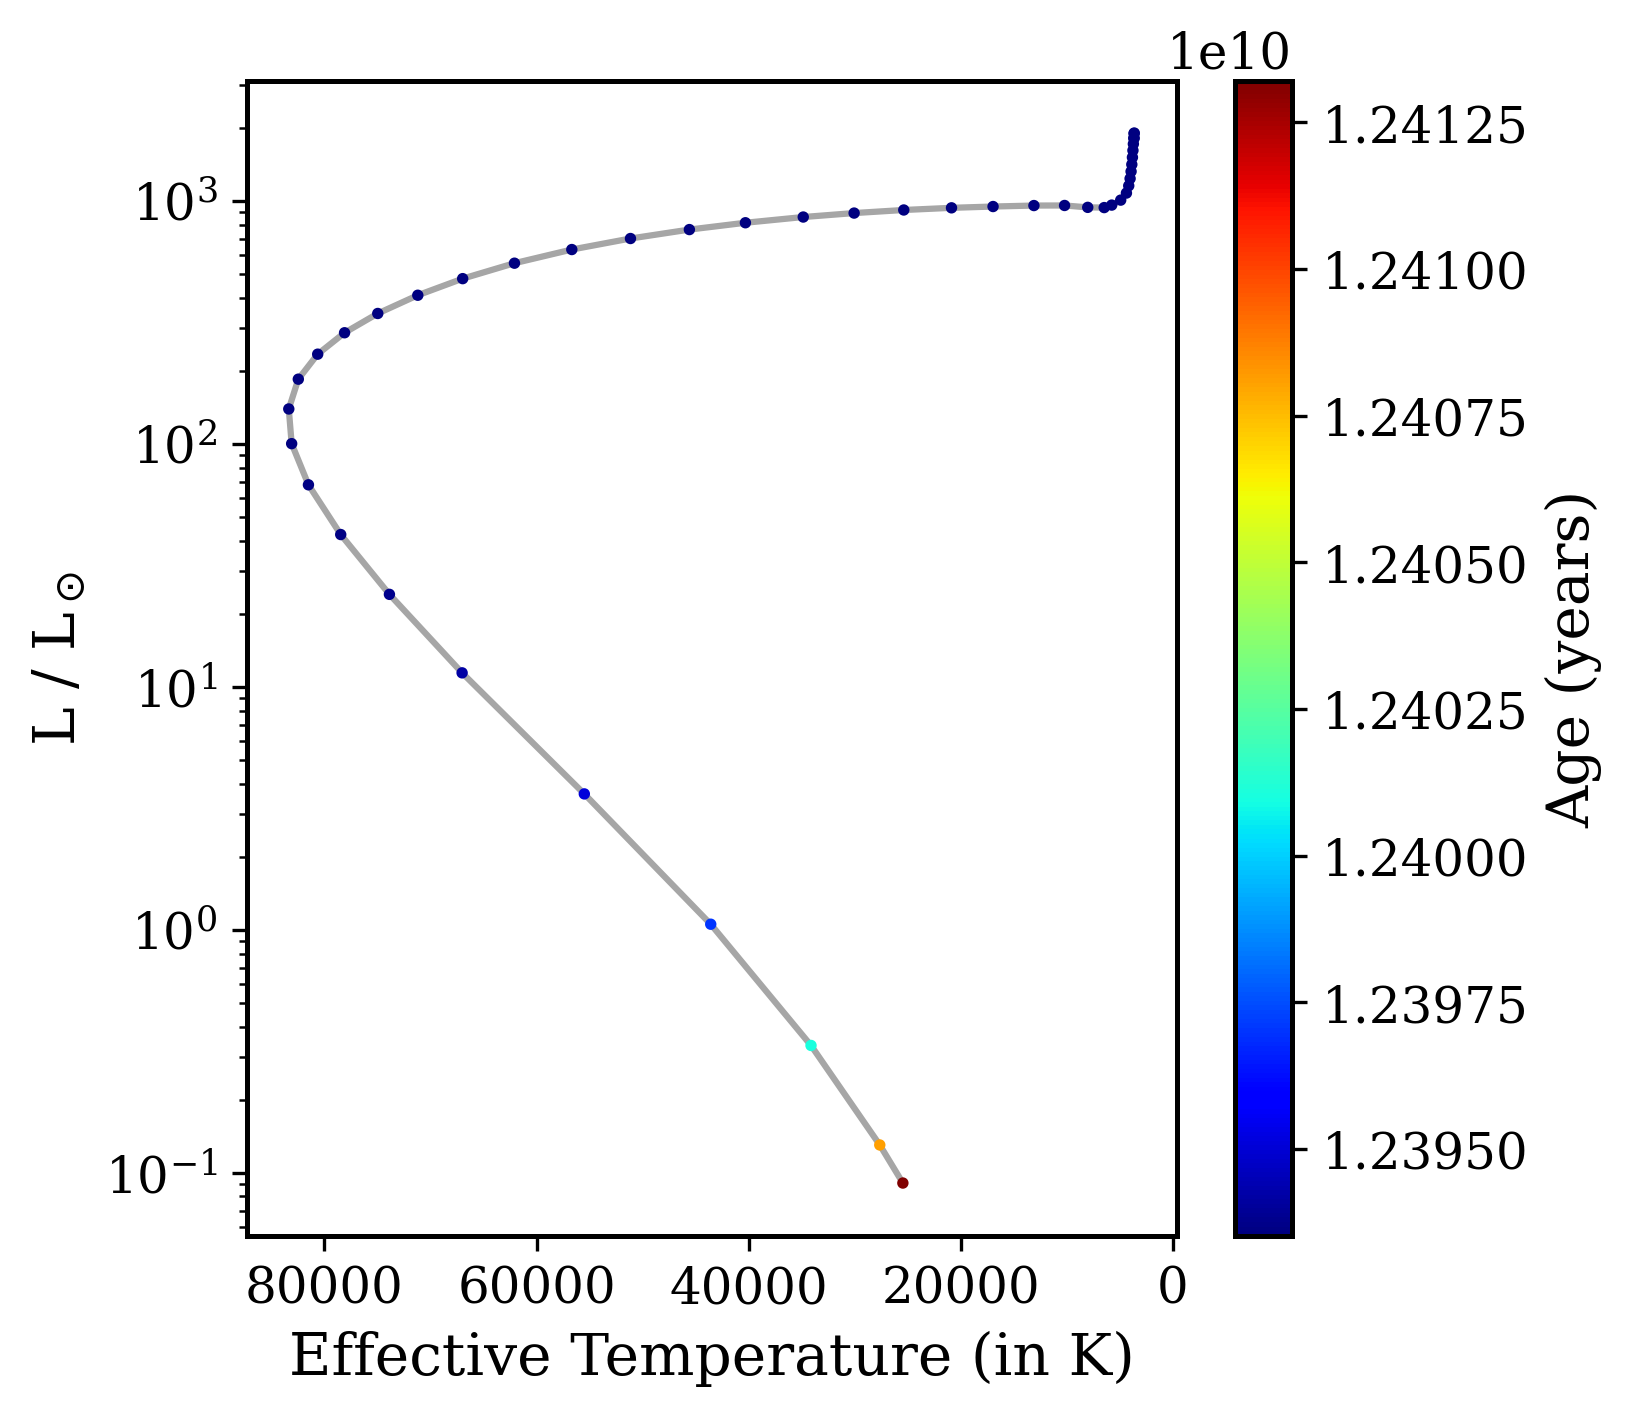

In [26]:
Teff = 10**hist_data['log_Teff'] # log(Teff/K)
L = 10**hist_data['log_L']       # log(L/Lsun)
age = hist_data['star_age']
L_nuc = 10**hist_data['log_Lnuc']

plt.figure(figsize=(5,5))
plt.plot(Teff, L, '-', color='gray', alpha=0.7, zorder=1)
scatter = plt.scatter(Teff, L, c=age, cmap='jet', s=3)#, edgecolor='k')
cbar = plt.colorbar(scatter)
cbar.set_label("Age (years)")  
# cmaps = ["viridis", "plasma", "coolwarm", "jet"]
plt.xlabel('Effective Temperature (in K)')
plt.ylabel('L / L$_\\odot$')
plt.yscale('log')

# plt.title('Evolutionary track for Sun (full: including the pre-MS phase too)', fontsize=11)
# plt.xlim([3.59,3.8])
# plt.ylim([-0.5,2.5])
plt.gca().invert_xaxis()


/var/folders/b_/91swq2f51r35gl42858jqwd00000gn/T/ipykernel_6727/2736583944.py:4: RuntimeWarning: divide by zero encountered in log10
  x = -np.log10(1 - mass/Mstar)


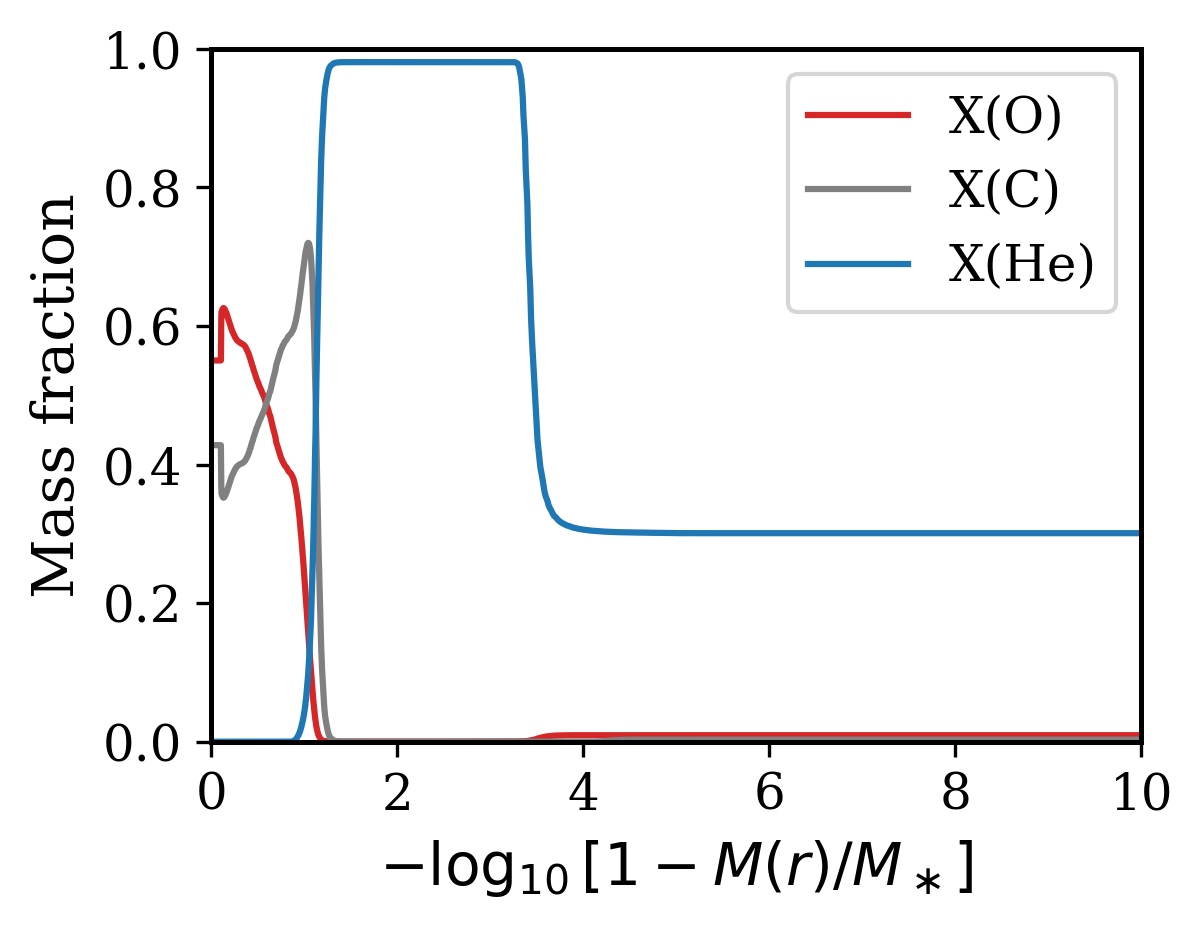

In [27]:
data = mw.read_profile('1M_pre_ms_to_wd/LOGS_to_wd/profile5.data')
mass = data['mass']
Mstar = 5.3758513004984732e-001
x = -np.log10(1 - mass/Mstar)

plt.plot(x, data['o16'], c='C3', label='X(O)')
plt.plot(x, data['c12'], c='gray', label='X(C)')
plt.plot(x, data['he4'], c='C0', label='X(He)')
plt.xlabel(r'$-\log_{10}[1 - M(r)/M_\ast]$')
plt.ylabel('Mass fraction')
plt.legend()
plt.xlim(0,10)
plt.ylim(0,1)
plt.show()